In [15]:
import importlib
import ldsc_71 as ld1
import ldsc_72 as ld2
import numpy as np
import pandas as pd
import h5py
from numba import jit, njit, prange, vectorize
from helperfuncs import *
import matplotlib.pyplot as plt
import seaborn as sns

# reloading modules
importlib.reload(ld1)
importlib.reload(ld2)

<module 'ldsc_72' from 'c:\\Users\\Hariharan\\Documents\\git_repos\\SNIPar\\ldsc_reg\\ldsc_72.py'>

# Simulations

In [127]:
N = 100
S = np.array([np.array([[5, 0], [0, 5]]),
    np.array([[2, 0], [0, 2]])] * 50 )# 50 = N/2
V = np.identity(2) * 10.0


model = ld2.sibreg(S = S)
model.simdata(V, N)

Warning there is no value for theta. Maybe consider simulating it
No value for U given. Generating a vector of ones (all SNPs weighted equally)
No value for r given. Generating a vector of ones for r
Effect Vectors Simulated!


In [128]:
model.solve()

No initial guess provided.
Making 'optimal' matrix
Log Likelihood:  -554.6429098517895
Gradient:  [-0.48405045 -0.05164723 -0.45727028]
Log Likelihood:  -554.6384248947284
Gradient:  [-0.48352309 -0.05161105 -0.45678629]
Log Likelihood:  -553.7456150209888
Gradient:  [0.47879674 0.15897337 0.41713855]
Log Likelihood:  -553.1936845206932
Gradient:  [-0.15321233  0.00026537 -0.15012274]
Log Likelihood:  -553.1070824553923
Gradient:  [0.08237122 0.0111492  0.07691225]
Log Likelihood:  -553.0816846589264
Gradient:  [-0.0080159  -0.00077726 -0.00759952]
Log Likelihood:  -553.0814225220194
Gradient:  [-3.76632475e-04 -7.11828851e-05 -3.45924899e-04]
Log Likelihood:  -553.0814219525886
Gradient:  [2.76815382e-06 4.24658182e-07 2.65890463e-06]
Final Estimate:
 [[1131.04669175  -33.77101993]
 [ -33.77101993 1169.89660347]]
Convergence Flag:  b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
Number of Iterations:  6
Final Gradient:  [-2.76815382e-06 -4.24658182e-07 -2.65890463e-06]


(array([[1131.04669175,  -33.77101993],
        [ -33.77101993, 1169.89660347]]),
 (array([1131.04669175,  -33.77101993, 1169.89660347]),
  553.0814219525886,
  {'grad': array([-2.76815382e-06, -4.24658182e-07, -2.65890463e-06]),
   'task': b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL',
   'funcalls': 8,
   'nit': 6,
   'warnflag': 0}))

In [2]:
# reading in causal data
file = "C:/Users/Hariharan/Documents/genoecon_work/snipardata/causal.hdf5"

hf = h5py.File(file, 'r')
theta  = hf.get('estimate')[()]
S = hf.get('estimate_covariance')[()]
f = hf.get('freqs')[()]

model = ld2.sibreg(S = S, f= f, theta = theta)

No value for U given. Generating a vector of ones (all SNPs weighted equally)
No value for r given. Generating a vector of ones for r


In [18]:
# restricting to only direct effects
theta_dir = theta[:, 0]
S_dir = S[:, 0, 0]
snp = np.arange(1, len(theta_dir) + 1, 1)

simulated_data_out = pd.DataFrame({'b' : theta_dir,
                                    'se' : S_dir,
                                    'snp' : snp})

simulated_data_out.to_csv("simulated_data_dir.csv")

In [125]:
model.solve()

No initial guess provided.
Making 'optimal' matrix
Log Likelihood:  76632.03730018022
Gradient:  [-10186540.70423764   -508426.61071043   -997109.1144656
  -4332468.92507793  -3209491.84670402  -5596069.28353835]
Log Likelihood:  77412.07761113478
Gradient:  [-10416331.27452042  -1026599.35153097  -1640989.33435947
  -5006790.66128204  -4049718.66740726  -6520170.78201466]
Log Likelihood:  76762.9939863377
Gradient:  [-10219230.42849685   -591790.91854022  -1101879.86469774
  -4439620.17149002  -3344581.84149721  -5742576.37461988]
Log Likelihood:  76658.62022211145
Gradient:  [-10192969.54724091   -525237.13776158  -1018282.41066966
  -4354028.29734585  -3236733.46447701  -5625534.09391698]
Log Likelihood:  76637.60423465294
Gradient:  [-10187878.17565956   -511942.38727446  -1001539.3344897
  -4336975.82952856  -3215189.24522277  -5602228.21549751]
Log Likelihood:  76633.21048499933
Gradient:  [-10186822.17445776   -509167.32706766   -998042.57808347
  -4333418.36505682  -3210692.197

(array([[ 4.06681463,  0.15601044, -0.81027527],
        [ 0.15601044, 15.64789364, -9.177272  ],
        [-0.81027527, -9.177272  , 12.385615  ]]),
 (array([ 4.06681463,  0.15601044, -0.81027527, 15.64789364, -9.177272  ,
         12.385615  ]),
  -76632.03730018032,
  {'grad': array([10186540.70423764,   508426.61071043,   997109.1144656 ,
           4332468.92507793,  3209491.84670402,  5596069.28353835]),
   'task': b'ABNORMAL_TERMINATION_IN_LNSRCH',
   'funcalls': 21,
   'nit': 0,
   'warnflag': 2}))

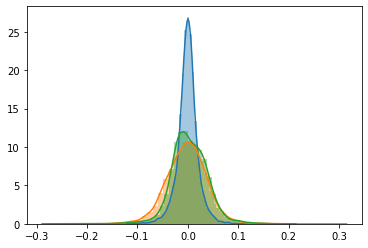

In [16]:
# taking complete cases of effects
theta_cc = theta[~np.isnan(theta).any(axis=1)]

# plotting
sns.distplot(theta_cc[:, 0])
sns.distplot(theta_cc[:, 1])
sns.distplot(theta_cc[:, 2])

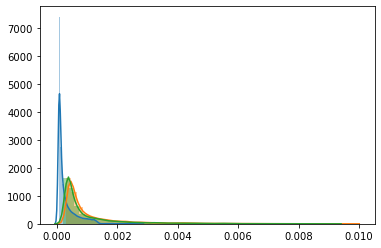

In [45]:
sns.distplot(S[:, 0, 0][~np.isnan(S[:, 0, 0])])
sns.distplot(S[:, 1, 1][~np.isnan(S[:, 1, 1])])
sns.distplot(S[:, 2, 2][~np.isnan(S[:, 2, 2])])

In [93]:
def core_logll_loop(V, N, S, theta, u, r):
    
    Gvec = np.zeros_like(V)
    log_ll = 0
        
    for i in prange(N):


        Si = S[i]
        thetai = theta[i, :]
        ui = u[i]
        ri = r[i]
        

        d, ddash = Si.shape
        assert d == ddash # Each S has to be a square matrix

        # calculate log likelihood
        log_ll += -(d/2) * np.log(2 * np.pi)
        dit_sv = np.linalg.det(Si + ri * V)
        log_ll += -(1/2) * np.log(dit_sv)
        log_ll += -(1/2) * np.trace(np.outer(thetai, thetai) @ np.linalg.inv(Si + ri * V))
        log_ll *= 1/ui

        # calculate gradient
        SV_inv = np.linalg.inv(Si + ri * V)
        G = -(1 / 2) * SV_inv
        G += (1 / 2) * np.dot(SV_inv,np.dot(np.outer(thetai, thetai),SV_inv))
        G *= 1/ui

        Gvec += G
        
    return log_ll, Gvec

In [192]:
@njit
def numba_core_logll_loop(V, N, S, theta, u, r):
    
    Gvec = np.zeros_like(V)
    log_ll = 0
        
    for i in prange(N):


        Si = S[i]
        thetai = theta[i, :]
        ui = u[i]
        ri = r[i]
        

        d, ddash = Si.shape
        assert d == ddash # Each S has to be a square matrix

        # calculate log likelihood
        log_ll += -(d/2) * np.log(2 * np.pi)
        dit_sv = np.linalg.det(Si + ri * V)
        log_ll += -(1/2) * np.log(dit_sv)
        log_ll += -(1/2) * np.trace(np.outer(thetai, thetai) @ np.linalg.inv(Si + ri * V))
        log_ll *= 1/ui

        # calculate gradient
        SV_inv = np.linalg.inv(Si + ri * V)
        G = -(1 / 2) * SV_inv
        G += (1 / 2) * np.dot(SV_inv,np.dot(np.outer(thetai, thetai),SV_inv))
        G *= 1/ui

        Gvec += G
        
    return log_ll, Gvec

In [193]:
def outer_neg_logll_grad(V, theta, S, u, r, loopfunc):
        
    # ============================================ #
    # returns negative log likelihood and negative
    # of the gradient
    # ============================================ #
    
    # Unflatten V into a matrix
    d = S[0].shape[0]
    V = return_to_symmetric(V, d)
    
    N = len(S)

    log_ll, Gvec = loopfunc(V, N, S, theta, u, r)


    Gvec = extract_upper_triangle(Gvec)

    return -log_ll, -Gvec

In [96]:
Vin = extract_upper_triangle(V)

In [105]:
%%timeit 
outer_neg_logll_grad(Vin, model.theta, model.S, model.u, model.r, 
                     loopfunc = core_logll_loop)

13.1 ms ± 188 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [195]:
%%timeit 
outer_neg_logll_grad(Vin, model.theta, model.S, model.u, model.r,
                     loopfunc = numba_core_logll_loop)

801 µs ± 35.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
